In [9]:
%matplotlib inline
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.datasets import make_regression, make_friedman1, make_friedman2, make_friedman3

In [97]:
errors = np.random.randn(100)

a = np.logspace(-10, 3, 1000)
a = sorted(np.insert(a, 0, 1))
ll_sqrt = -np.array([stats.norm.logpdf(errors, loc=0, scale=np.sqrt(np.abs(errors*alpha))).mean() for alpha in a])
ll_abs = -np.array([stats.norm.logpdf(errors, loc=0, scale=np.abs(errors*alpha)).mean() for alpha in a])
ll_2 = -np.array([stats.norm.logpdf(errors, loc=0, scale=np.abs(errors*alpha)**2).mean() for alpha in a])
ll_sqrt.min(), a[ll_sqrt.argmin()], ll_abs.min(), a[ll_abs.argmin()], ll_2.min(), a[ll_2.argmin()]

(1.0322812646369715,
 0.8490415204088755,
 0.800681025919651,
 1.0,
 2.835016832576162,
 3.798215306190736)

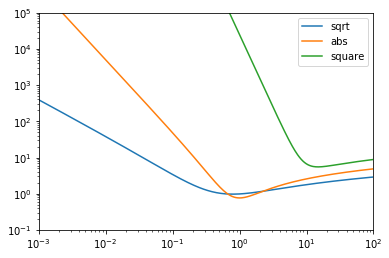

In [63]:
plt.figure()
plt.loglog(a, ll_sqrt, label='sqrt')
plt.loglog(a, ll_abs, label='abs')
plt.loglog(a, ll_2, label='square')
plt.ylim(1e-1, 1e5)
plt.xlim(1e-3, 1e2)
plt.legend()
plt.show()

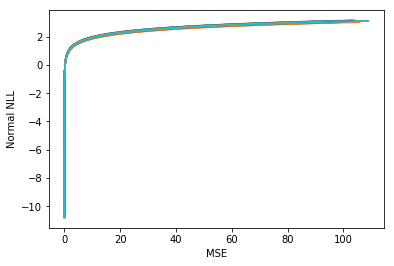

In [81]:
for _ in range(100):
    r = []
    errors = np.random.randn(1000)
    for i in np.linspace(1e-5, 10):
        e = i*errors
        mse = (e**2).mean()
        ll = -stats.norm.logpdf(e, loc=0, scale=np.abs(e)).mean()
        r.append((mse, ll))

    mse, ll = zip(*r)
    plt.plot(mse, ll)
    plt.ylabel('Normal NLL')
    plt.xlabel('MSE')
plt.show()


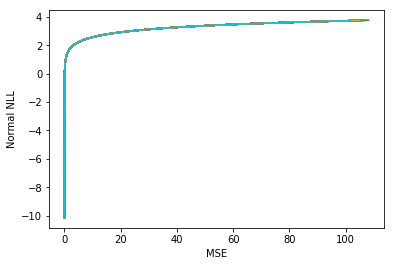

In [82]:
for _ in range(100):
    r = []
    errors = np.random.randn(1000)
    for i in np.linspace(1e-5, 10):
        e = i*errors
        mse = (e**2).mean()
        ll = -stats.norm.logpdf(e, loc=0, scale=np.std(e)).mean()
        r.append((mse, ll))

    mse, ll = zip(*r)
    plt.plot(mse, ll)
    plt.ylabel('Normal NLL')
    plt.xlabel('MSE')
plt.show()

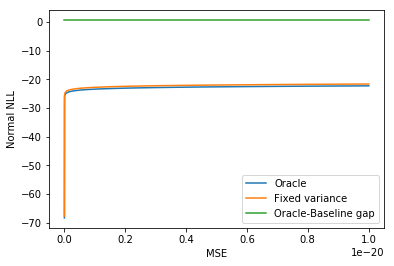

In [131]:
errors = np.random.randn(100000)

r = []
for i in np.linspace(1e-30, 1e-10):
    e = i*errors
    mse = (e**2).mean()
    ll = -stats.norm.logpdf(e, loc=0, scale=np.abs(e)).mean()
    r.append((mse, ll))

mse_o, ll_o = zip(*r)
plt.plot(mse_o, ll_o, label='Oracle')

r = []
for i in np.linspace(1e-30, 1e-10):
    e = i*errors
    mse = (e**2).mean()
    ll = -stats.norm.logpdf(e, loc=0, scale=np.std(e)).mean()
    r.append((mse, ll))

mse_f, ll_f = zip(*r)
plt.plot(mse_f, ll_f, label='Fixed variance')
plt.plot(mse_f, np.array(ll_f)-np.array(ll_o), label='Oracle-Baseline gap')
plt.ylabel('Normal NLL')
plt.xlabel('MSE')
plt.legend()

In [121]:
np.array(mse_o)-np.array(mse_f)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [132]:
(np.array(ll_f)-np.array(ll_o))

array([0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218,
       0.63503218, 0.63503218, 0.63503218, 0.63503218, 0.63503218])

In [ ]:
xgb = XGBRegressor()

In [57]:
r = []
for _ in range(10):
    X, y = make_regression(10000, noise=1.0)
    Xt, yt = make_regression(10000, noise=1.0)
    xgb.fit(X,y)
    te = y - xgb.predict(X)
    e = yt - xgb.predict(Xt)
    r.append(((e**2).mean(),
              -stats.norm.logpdf(e, loc=np.mean(te), scale=np.std(te)).mean(),
              -stats.norm.logpdf(e, loc=e, scale=np.abs(e)).mean()))
mse, ll_b, ll_o = zip(*sorted(r))

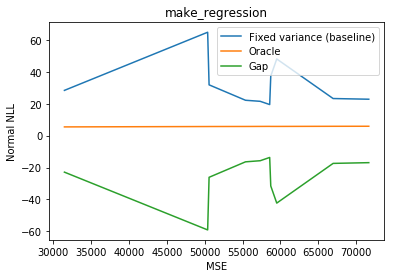

In [58]:
plt.plot(mse, ll_b, label='Fixed variance (baseline)')
plt.plot(mse, ll_o, label='Oracle')
plt.plot(mse, np.array(ll_o)-np.array(ll_b), label='Gap')
plt.ylabel('Normal NLL')
plt.xlabel('MSE')
plt.title('make_regression')
plt.legend()

In [49]:
r = []
for _ in range(100):
    X, y = make_friedman1(1000, noise=1.0)
    Xt, yt = make_friedman1(1000, noise=1.0)
    xgb.fit(X,y)
    e = yt - xgb.predict(Xt)
    r.append(((e**2).mean(),
              -stats.norm.logpdf(e, loc=np.mean(e), scale=np.std(e)).mean(),
              -stats.norm.logpdf(e, loc=e, scale=np.abs(e)).mean()))
mse, ll_b, ll_o = zip(*sorted(r))

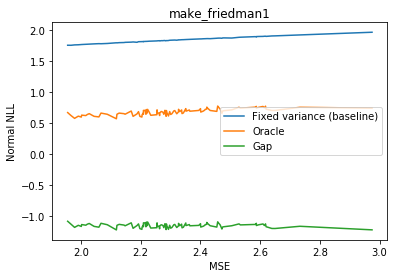

In [50]:
plt.plot(mse, ll_b, label='Fixed variance (baseline)')
plt.plot(mse, ll_o, label='Oracle')
plt.plot(mse, np.array(ll_o)-np.array(ll_b), label='Gap')
plt.ylabel('Normal NLL')
plt.xlabel('MSE')
plt.title('make_friedman1')

plt.legend()

In [51]:
r = []
for _ in range(100):
    X, y = make_friedman2(1000, noise=1.0)
    Xt, yt = make_friedman2(1000, noise=1.0)
    xgb.fit(X,y)
    e = yt - xgb.predict(Xt)
    r.append(((e**2).mean(),
              -stats.norm.logpdf(e, loc=np.mean(e), scale=np.std(e)).mean(),
              -stats.norm.logpdf(e, loc=e, scale=np.abs(e)).mean()))
mse, ll_b, ll_o = zip(*sorted(r))

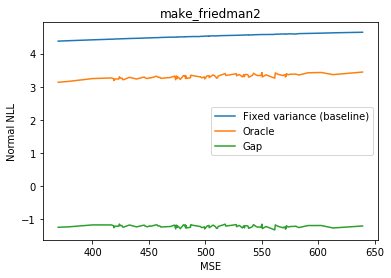

In [52]:
plt.plot(mse, ll_b, label='Fixed variance (baseline)')
plt.plot(mse, ll_o, label='Oracle')
plt.plot(mse, np.array(ll_o)-np.array(ll_b), label='Gap')
plt.ylabel('Normal NLL')
plt.xlabel('MSE')
plt.title('make_friedman2')
plt.legend()

In [53]:
r = []
for _ in range(100):
    X, y = make_friedman3(1000, noise=1.0)
    Xt, yt = make_friedman3(1000, noise=1.0)
    xgb.fit(X,y)
    e = yt - xgb.predict(Xt)
    r.append(((e**2).mean(),
              -stats.norm.logpdf(e, loc=np.mean(e), scale=np.std(e)).mean(),
              -stats.norm.logpdf(e, loc=e, scale=np.abs(e)).mean()))
mse, ll_b, ll_o = zip(*sorted(r))

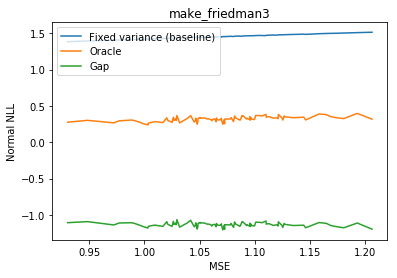

In [54]:
plt.plot(mse, ll_b, label='Fixed variance (baseline)')
plt.plot(mse, ll_o, label='Oracle')
plt.plot(mse, np.array(ll_o)-np.array(ll_b), label='Gap')
plt.ylabel('Normal NLL')
plt.xlabel('MSE')
plt.title('make_friedman3')
plt.legend()